# CMPS 320- Machine Learning
## Lab 1: Cluster Analysis
### Author: Dr. Osei Tweneboah

In [1]:
# Load packages

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#import seaborn as sns

from sklearn.preprocessing import scale

%matplotlib inline
plt.style.use('seaborn-v0_8-white')

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

## K-Means Clustering

We begin with a simple simulated example in which there truly are two clusters in the
data: the first 25 observations have a mean shift relative to the next 25 observations.

In [3]:
# Generate data
np.random.seed(2)
X = np.random.standard_normal((50,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

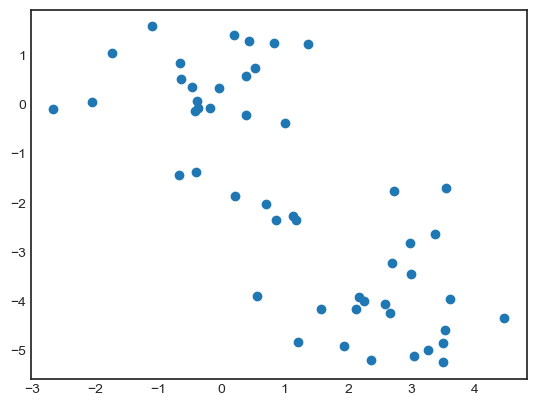

In [4]:
# Plot of the generated unlabeled datasets
plt.scatter(X[:,0], X[:,1])
plt.show()

We now perform K-means clustering with $K = 2$.

In [10]:
from sklearn.cluster import KMeans
#OMP_NUM_THREADS = 1
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X)

C:\Users\Badle\MLClass\env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, n_init=20)

In [11]:
pd.Series(km1.labels_).value_counts()

1    26
0    24
Name: count, dtype: int64

K-means clustering with 2 clusters of sizes  26 , and  24

In [12]:
# Check cluster means or centrioids the algorithm found
km1.cluster_centers_

array([[-0.23940153,  0.14703307],
       [ 2.53287159, -3.80815122]])

The cluster assignments of the 50 observations are contained in km1.labels_

In [13]:
km1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1])

The K-means clustering perfectly separated the observations into two clusters
even though we did not supply any group information to kmeans(). 

In this example, we knew that there really were two clusters because we generated the data. However, for real data, in general we do not know the true number of clusters. We could instead have performed K-means clustering on this example with $K = 3$.

In [14]:
np.random.seed(4)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)

C:\Users\Badle\MLClass\env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=20)

In [15]:
pd.Series(km2.labels_).value_counts()

0    21
2    20
1     9
Name: count, dtype: int64

K-means clustering with 3 clusters of sizes $21, 20$, and  $9$

In [16]:
# Check cluster means or centrioids the algorithm found
km2.cluster_centers_

array([[ 2.82805911, -4.11351797],
       [ 0.69945422, -2.14934345],
       [-0.27876523,  0.51224152]])

In [17]:
# Check cluster assignments of the 50 observations
km2.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 1])

In [18]:
# Check mean squared distance of samples to their closest cluster center.
km2.inertia_

68.97379200939724

We can plot the data, with each observation colored according to its cluster
assignment.

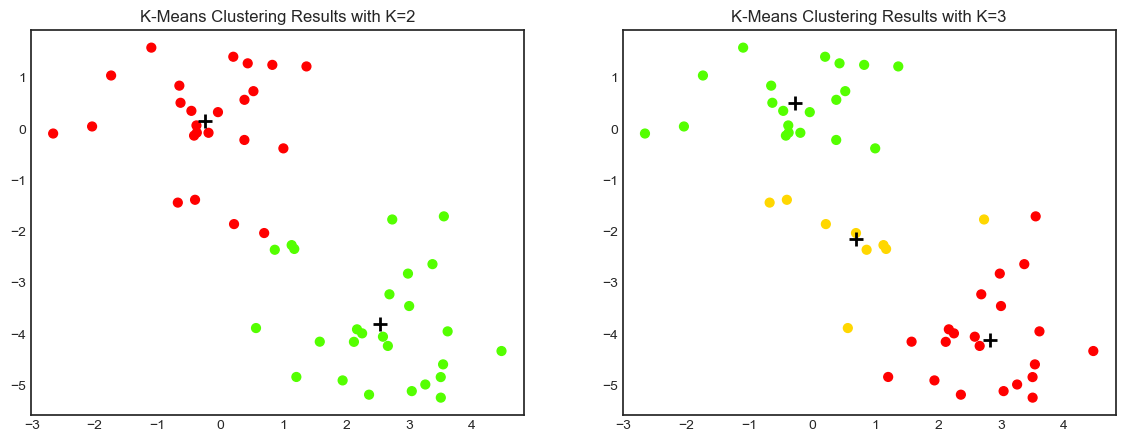

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(X[:,0], X[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(X[:,0], X[:,1], s=40, c=km2.labels_, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

### Centroid initialization methods
If you happen to know approximately where the centroids should be, then you can set the init hyperparameter to a NumPy array containing the list of centroids, and set n_init to $1$.

Another solution is to run the algorithm multiple times with different random initializations
and keep the best solution. The best solution can be obtained via the models inertia which is
the mean squared distance between each instance and its closest centroid.

The KMeans class runs the algorithm n_init times and keeps the model with the lowest inertia.

**Remarks**: When performing K-means clustering, in addition to using multiple initial
cluster assignments, it is also important to set a random seed using the np.random.seed() function. This way, the initial cluster assignments can be replicated, and the K-means output will be fully reproducible.

##  Perform Hierarchical or  Agglomerative Clustering

In the following example we use the data from K-Means clustering example to plot the hierarchical clustering dendrogram using complete, single, and average linkage clustering,
with Euclidean distance as the dissimilarity measure. 

In [20]:
# Generate data
np.random.seed(2)
X = np.random.standard_normal((50,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

We begin by clustering observations using single linkage. 

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

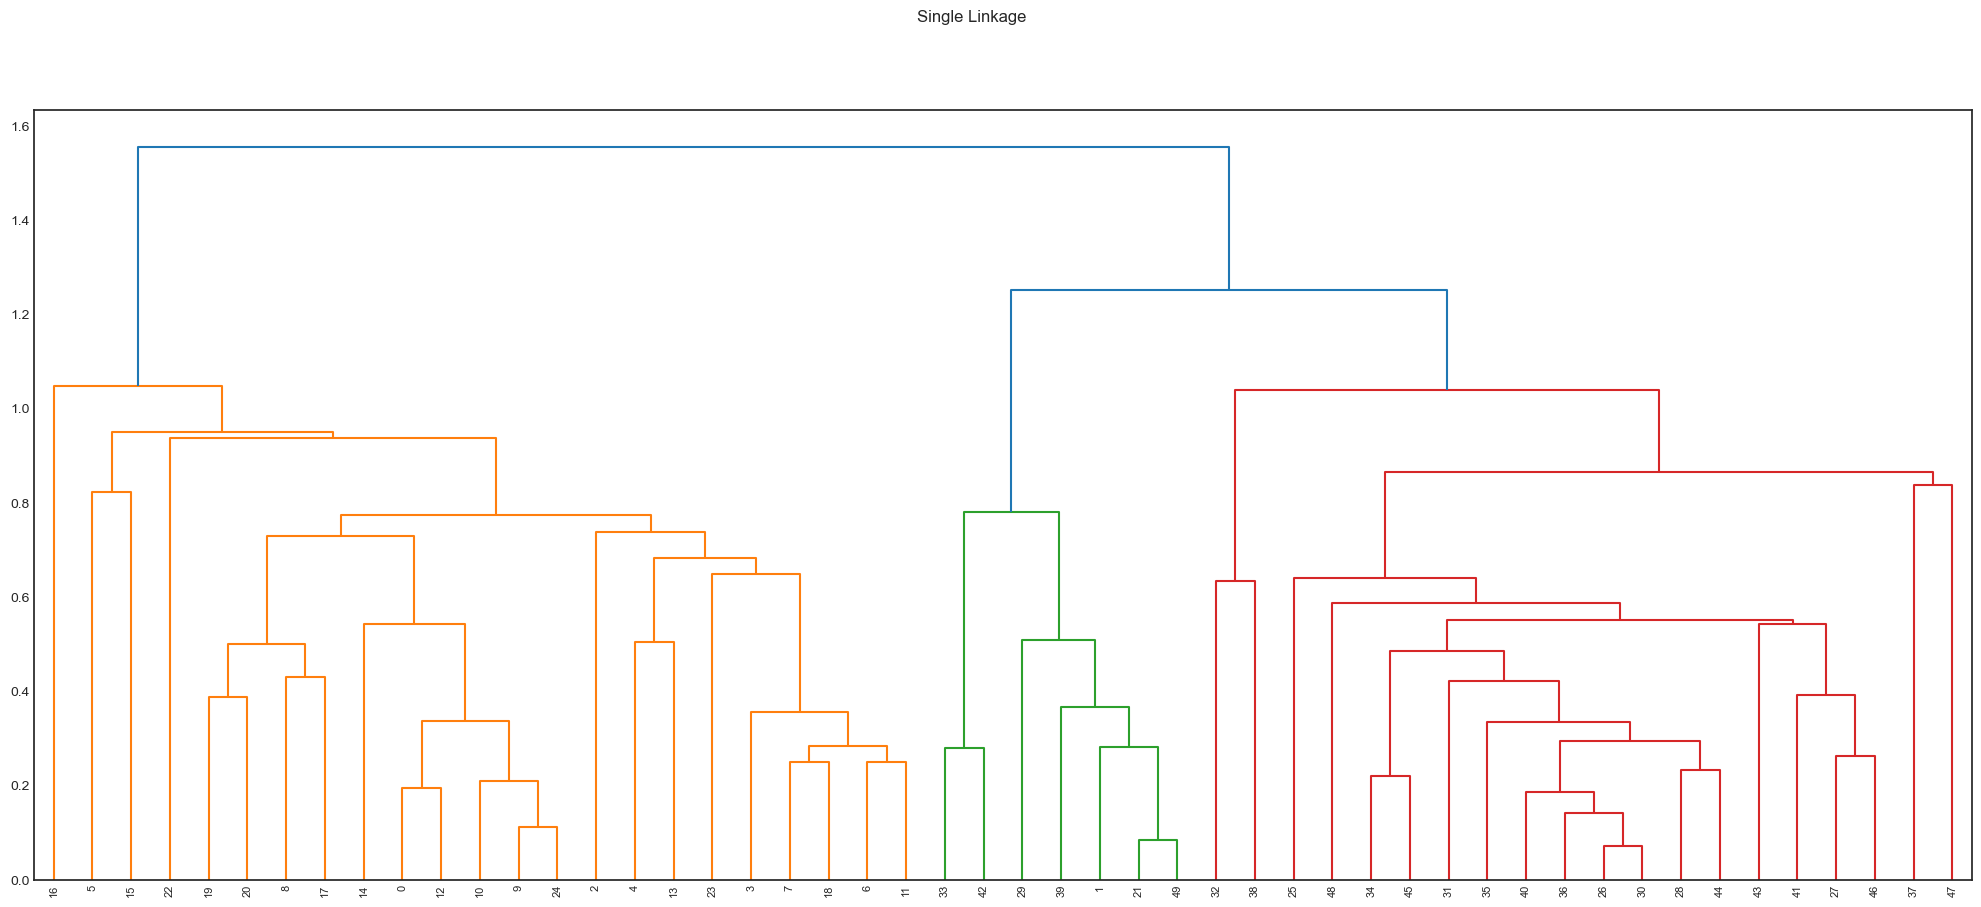

In [22]:
# Using Single Linkage
Z= linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
fig.suptitle("Single Linkage")
dn = dendrogram(Z) # plotting the dendrograms
plt.show()

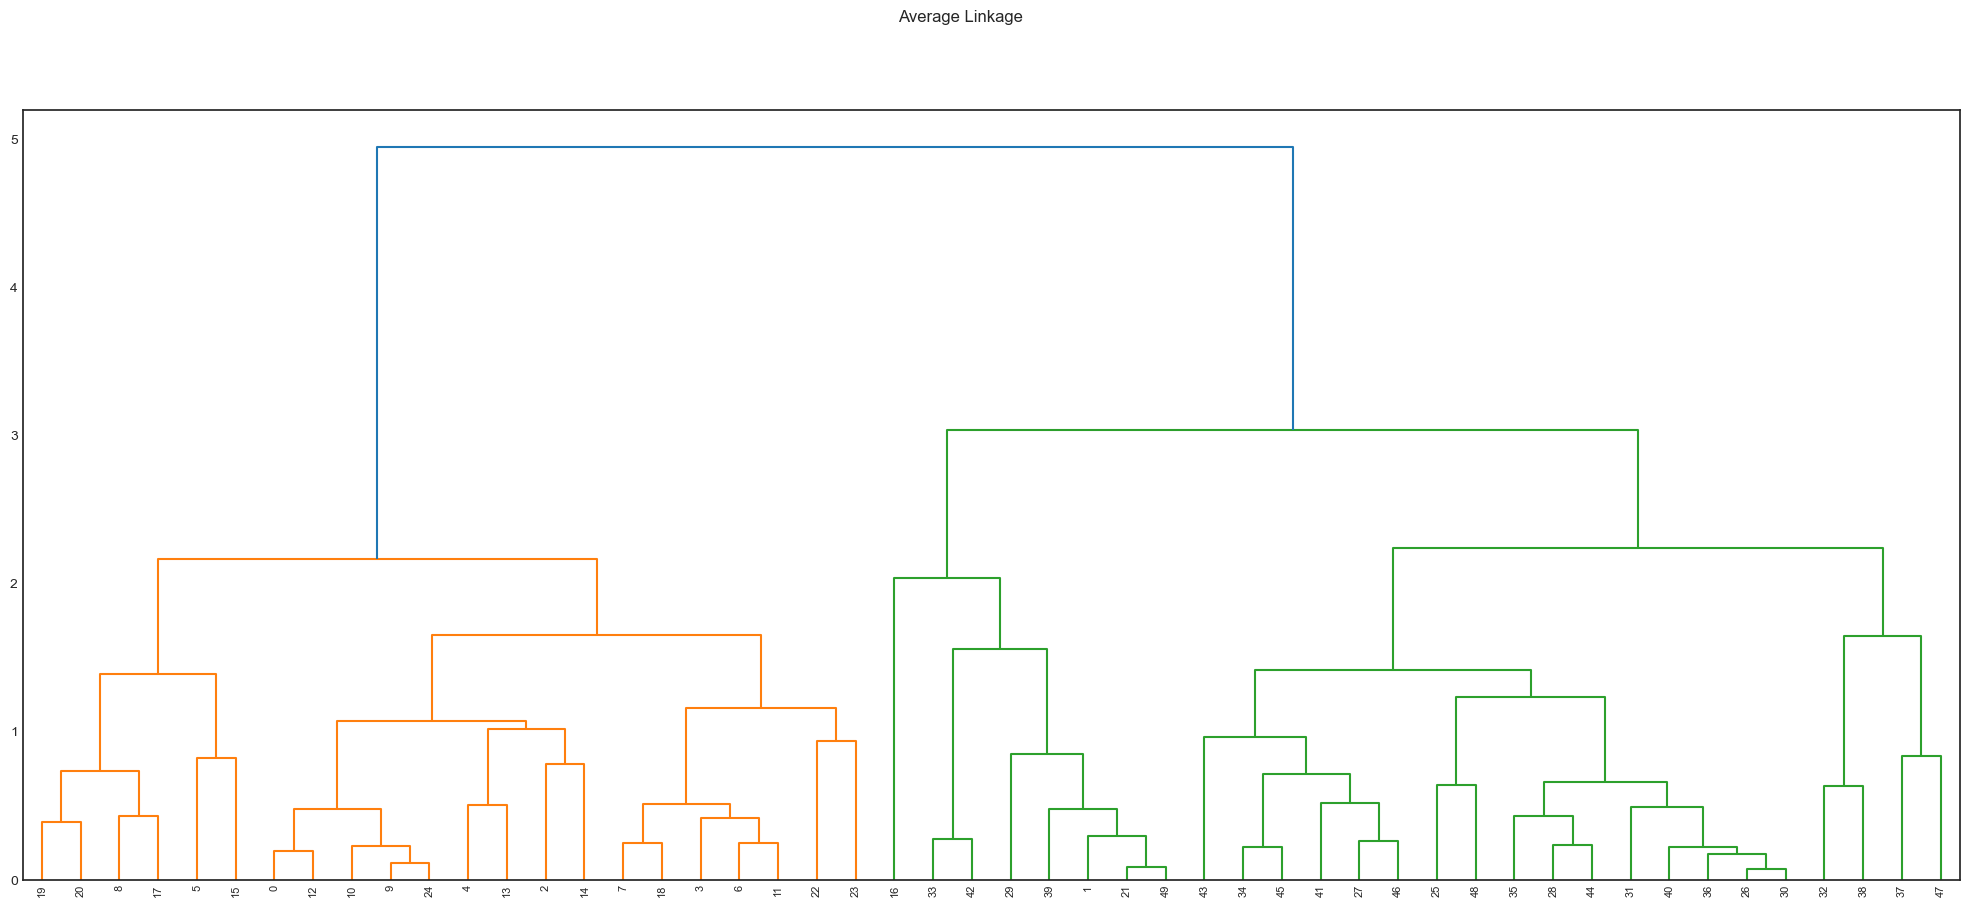

In [23]:
# Using Average Linkage
Z= linkage(X, 'average')
fig = plt.figure(figsize=(25, 10))
fig.suptitle("Average Linkage")
dn = dendrogram(Z) # plotting the dendrograms
plt.show()

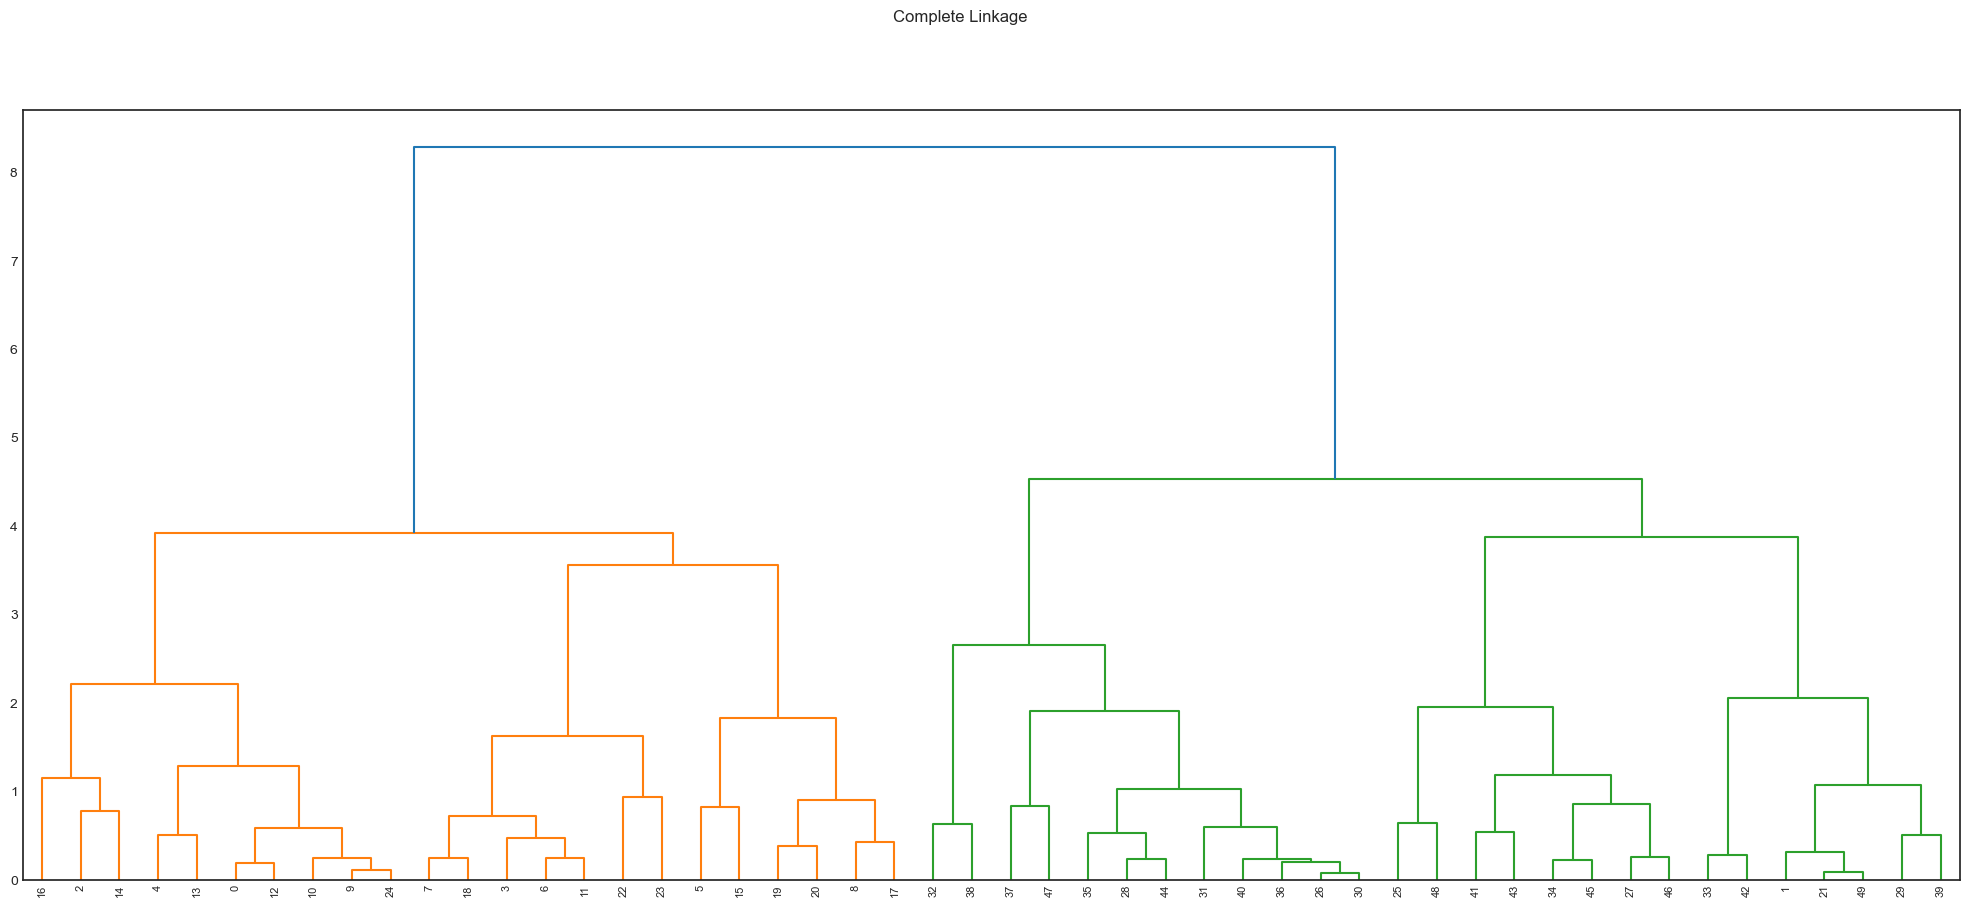

In [24]:
# Using Complete Linkage
Z= linkage(X, 'complete')
fig = plt.figure(figsize=(25, 10))
fig.suptitle("Complete Linkage")
dn = dendrogram(Z) # plotting the dendrograms
plt.show()